In [77]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pp


import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sbn


In [78]:
rfm_clv = pd.read_csv('../exports/online_retail_rfm_clv(historical)_realdata.csv')
rfm_clv

,Unnamed: 0,customer_id,recency,frequency,monetary,clv_historical
0,0,12347.0,3,7,4060.40,4060.40
1,1,12348.0,76,4,1186.68,1186.68
2,2,12349.0,19,1,1353.80,1353.80
3,3,12350.0,311,1,294.40,294.40
4,4,12352.0,37,7,1385.74,1385.74
...,...,...,...,...,...,...
4285,4285,18280.0,278,1,180.60,180.60
4286,4286,18281.0,181,1,46.92,46.92
4287,4287,18282.0,8,2,178.05,178.05
4288,4288,18283.0,4,16,2078.93,2078.93


In [79]:
rfm_clv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4290 entries, 0 to 4289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4290 non-null   int64  
 1   customer_id     4290 non-null   float64
 2   recency         4290 non-null   int64  
 3   frequency       4290 non-null   int64  
 4   monetary        4290 non-null   float64
 5   clv_historical  4290 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 201.2 KB


In [80]:
relevant_cols = ["recency", "frequency", "monetary" , "clv_historical"]
rfm_clv_n = rfm_clv[relevant_cols]

In [81]:
rfm_clv_n.head()

,recency,frequency,monetary,clv_historical
0,3,7,4060.40,4060.40
1,76,4,1186.68,1186.68
2,19,1,1353.80,1353.80
3,311,1,294.40,294.40
4,37,7,1385.74,1385.74



 # **Normalization,Standardization**

In [82]:
import sklearn.preprocessing as pp

## **MinMax Normalization**

In [83]:
scaler1 = pp.MinMaxScaler()
minmax_rfm = scaler1.fit_transform(rfm_clv_n)
minmax_rfm

array([[0.00536193, 0.02926829, 0.0255245 , 0.0255245 ],
       [0.20107239, 0.01463415, 0.0074468 , 0.0074468 ],
       [0.04825737, 0.        , 0.0084981 , 0.0084981 ],
       ...,
       [0.01876676, 0.00487805, 0.00110182, 0.00110182],
       [0.0080429 , 0.07317073, 0.01305968, 0.01305968],
       [0.11260054, 0.0097561 , 0.01153953, 0.01153953]])

In [84]:
relevant_cols

['recency', 'frequency', 'monetary', 'clv_historical']

In [85]:
# Array → DataFrame

minmax_df = pd.DataFrame(minmax_rfm, columns=relevant_cols)
minmax_df.head()

,recency,frequency,monetary,clv_historical
0,0.005362,0.029268,0.025525,0.025525
1,0.201072,0.014634,0.007447,0.007447
2,0.048257,0.000000,0.008498,0.008498
3,0.831099,0.000000,0.001834,0.001834
4,0.096515,0.029268,0.008699,0.008699


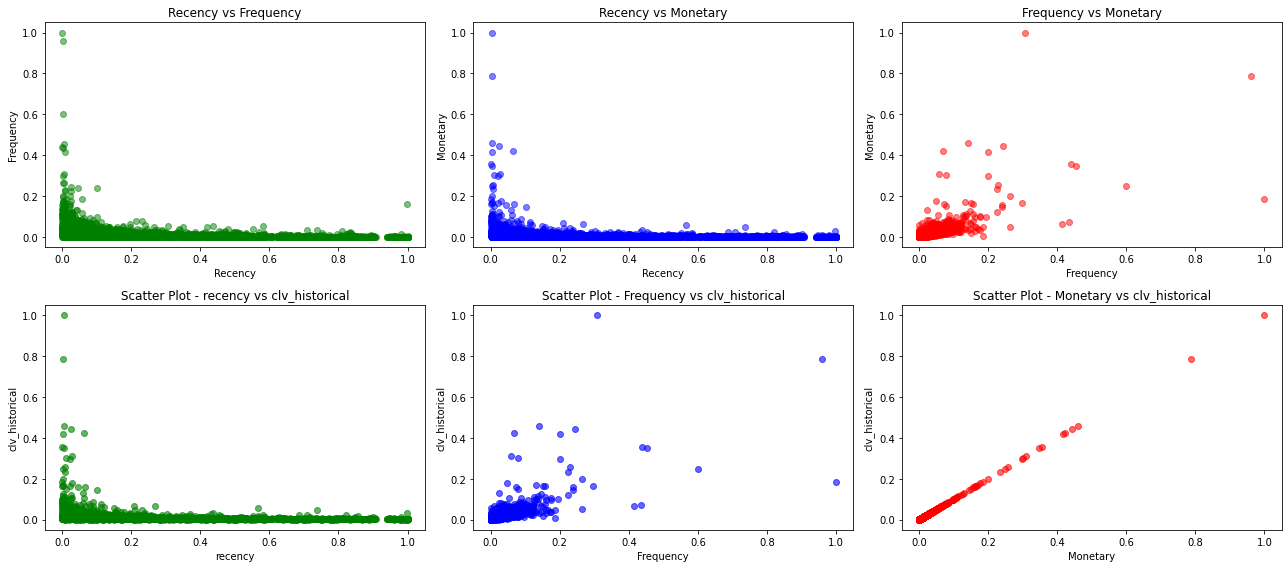

In [86]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(minmax_df['recency'], minmax_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(minmax_df['recency'], minmax_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(minmax_df['frequency'], minmax_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_historical
plt.subplot(2, 3, 4)
plt.scatter(minmax_df['recency'], minmax_df['clv_historical'], color='green', alpha=0.6)
plt.xlabel('recency')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - recency vs clv_historical')

# Frequency vs clv_historical
plt.subplot(2, 3, 5)
plt.scatter(minmax_df['frequency'], minmax_df['clv_historical'], color='blue', alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - Frequency vs clv_historical')

# Frequency vs clv_historical
plt.subplot(2, 3, 6)
plt.scatter(minmax_df['monetary'], minmax_df['clv_historical'], color='red', alpha=0.6)
plt.xlabel('Monetary')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - Monetary vs clv_historical')



plt.tight_layout()
plt.show()


## **Standard Normalization**

In [87]:
scaler2 = pp.StandardScaler()
std_rfm = scaler2.fit_transform(rfm_clv_n)
std_rfm

array([[-0.90105616,  0.37571297,  0.50773997,  0.50773997],
       [-0.17090487, -0.02573377, -0.08846512, -0.08846512],
       [-0.741023  , -0.4271805 , -0.05379306, -0.05379306],
       ...,
       [-0.8510458 , -0.29336492, -0.29772363, -0.29772363],
       [-0.89105409,  1.58005318,  0.09664825,  0.09664825],
       [-0.50097326, -0.15954934,  0.04651359,  0.04651359]])

In [88]:
# Array → DataFrame

std_df = pd.DataFrame(std_rfm , columns=relevant_cols)
std_df.head()

,recency,frequency,monetary,clv_historical
0,-0.901056,0.375713,0.507740,0.507740
1,-0.170905,-0.025734,-0.088465,-0.088465
2,-0.741023,-0.427181,-0.053793,-0.053793
3,2.179582,-0.427181,-0.273585,-0.273585
4,-0.560986,0.375713,-0.047167,-0.047167


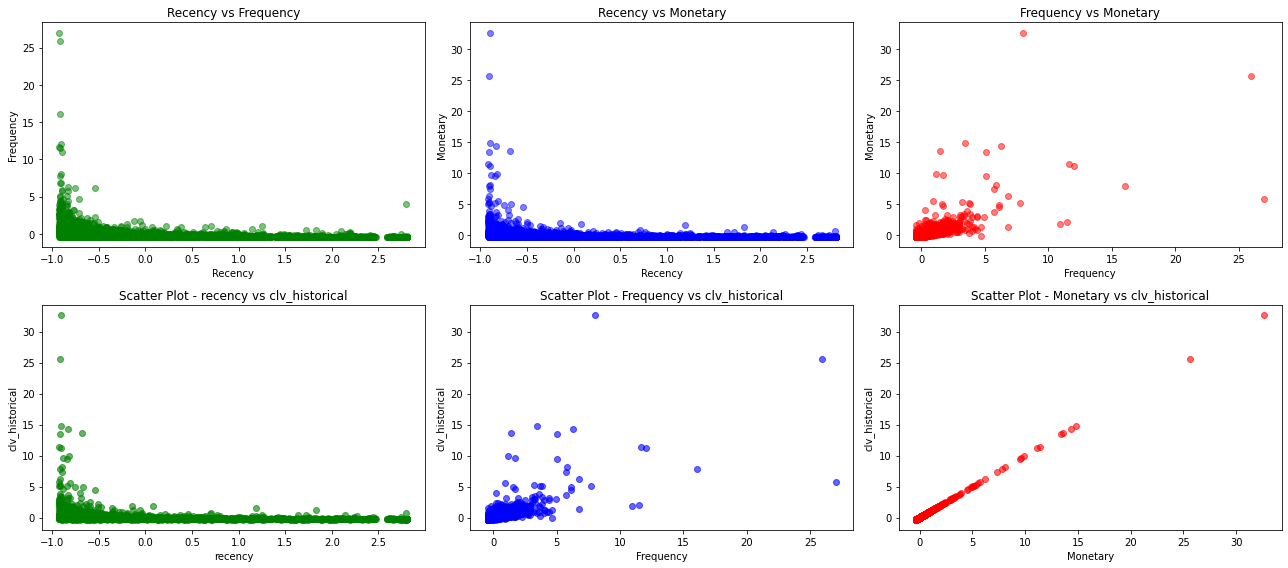

In [89]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(std_df['recency'], std_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(std_df['recency'], std_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(std_df['frequency'], std_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_historical
plt.subplot(2, 3, 4)
plt.scatter(std_df['recency'], std_df['clv_historical'],color='green', alpha=0.6)
plt.xlabel('recency')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - recency vs clv_historical')

# Frequency vs clv_historical
plt.subplot(2, 3, 5)
plt.scatter(std_df['frequency'], std_df['clv_historical'],color='blue', alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - Frequency vs clv_historical')

# Frequency vs clv_historical
plt.subplot(2, 3, 6)
plt.scatter(std_df['monetary'], std_df['clv_historical'],color='red', alpha=0.6)
plt.xlabel('Monetary')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - Monetary vs clv_historical')



plt.tight_layout()
plt.show()


## **Robust Normalization**

In [90]:
scaler3 = pp.RobustScaler()
robust_rfm = scaler3.fit_transform(rfm_clv_n)
robust_rfm

array([[-0.384     ,  1.25      ,  2.72144345,  2.72144345],
       [ 0.2       ,  0.5       ,  0.43650611,  0.43650611],
       [-0.256     , -0.25      ,  0.56938569,  0.56938569],
       ...,
       [-0.344     ,  0.        , -0.36547055, -0.36547055],
       [-0.376     ,  3.5       ,  1.1459473 ,  1.1459473 ],
       [-0.064     ,  0.25      ,  0.9538078 ,  0.9538078 ]])

In [91]:
# Array → DataFrame

robust_df = pd.DataFrame(robust_rfm , columns = relevant_cols)
robust_df.head()

,recency,frequency,monetary,clv_historical
0,-0.384,1.25,2.721443,2.721443
1,0.200,0.50,0.436506,0.436506
2,-0.256,-0.25,0.569386,0.569386
3,2.080,-0.25,-0.272959,-0.272959
4,-0.112,1.25,0.594782,0.594782


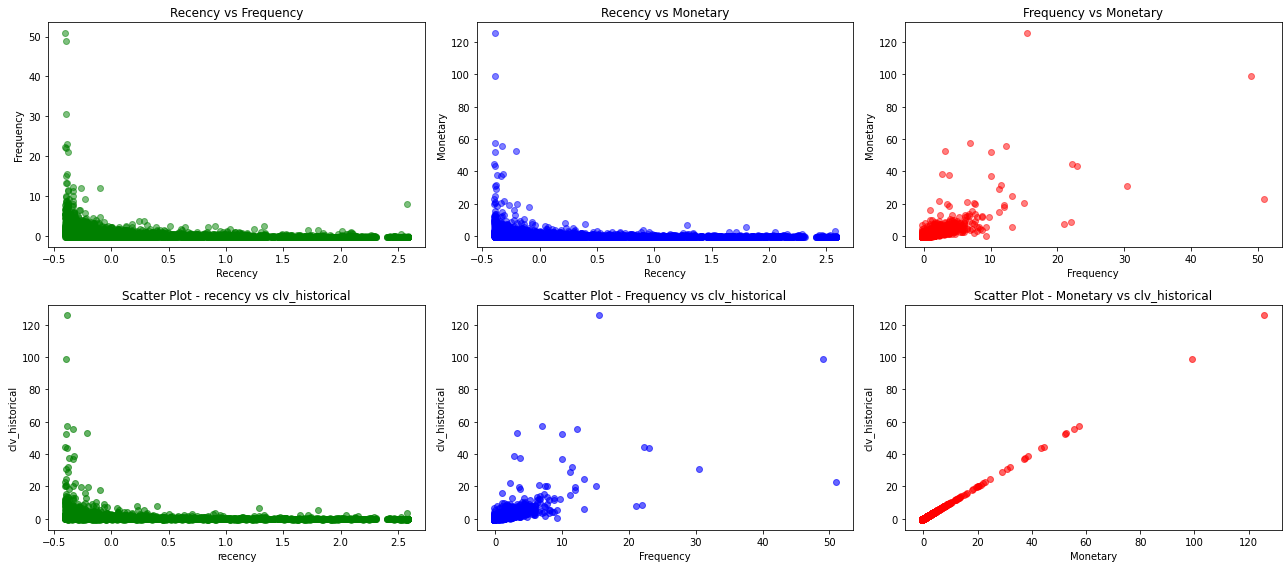

In [92]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(robust_df['recency'], robust_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(robust_df['recency'], robust_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(robust_df['frequency'], robust_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_historical
plt.subplot(2, 3, 4)
plt.scatter(robust_df['recency'], robust_df['clv_historical'],color='green', alpha=0.6)
plt.xlabel('recency')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - recency vs clv_historical')

# Frequency vs clv_historical
plt.subplot(2, 3, 5)
plt.scatter(robust_df['frequency'], robust_df['clv_historical'], color='blue', alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - Frequency vs clv_historical')

# Frequency vs clv_historical
plt.subplot(2, 3, 6)
plt.scatter(robust_df['monetary'], robust_df['clv_historical'],color='red', alpha=0.6)
plt.xlabel('Monetary')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - Monetary vs clv_historical')



plt.tight_layout()
plt.show()


# **Clustering - KMeans - ElbowPlot**

In [93]:
from sklearn.cluster import KMeans

In [94]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values


In [95]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()


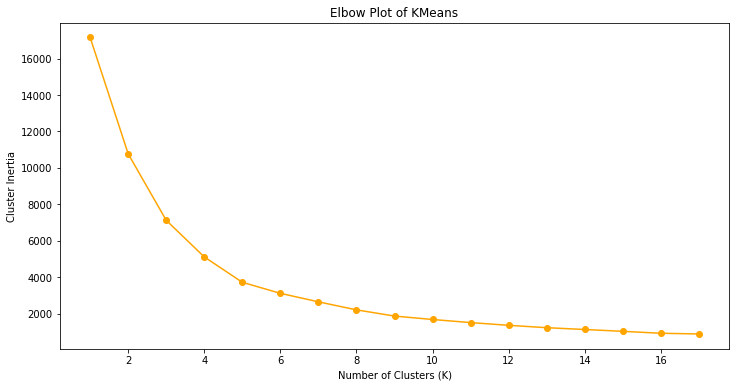

In [96]:
clusters_centers, k_values = find_best_clusters(std_rfm, 18)

generate_elbow_plot(clusters_centers, k_values)


In [97]:
kmeans_model = KMeans(n_clusters = 5)
kmeans_model.fit(std_rfm)

KMeans(n_clusters=5)

In [98]:
std_df["clusters"] = kmeans_model.labels_
std_df.head()

,recency,frequency,monetary,clv_historical,clusters
0,-0.901056,0.375713,0.507740,0.507740,0
1,-0.170905,-0.025734,-0.088465,-0.088465,0
2,-0.741023,-0.427181,-0.053793,-0.053793,0
3,2.179582,-0.427181,-0.273585,-0.273585,4
4,-0.560986,0.375713,-0.047167,-0.047167,0


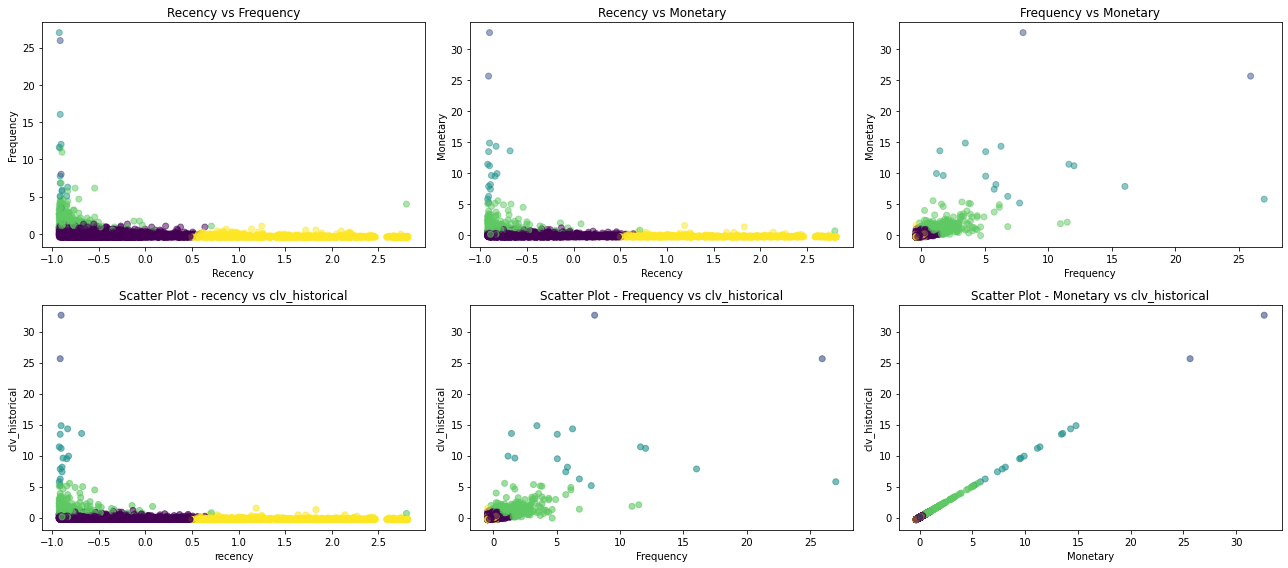

In [99]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(std_df['recency'], std_df['frequency'], c = std_df["clusters"], alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(std_df['recency'], std_df['monetary'], c = std_df["clusters"], alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(std_df['frequency'], std_df['monetary'], c = std_df["clusters"], alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_historical
plt.subplot(2, 3, 4)
plt.scatter(std_df['recency'], std_df['clv_historical'], c = std_df["clusters"] , alpha=0.6)
plt.xlabel('recency')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - recency vs clv_historical')

# Frequency vs clv_historical
plt.subplot(2, 3, 5)
plt.scatter(std_df['frequency'], std_df['clv_historical'], c = std_df["clusters"], alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - Frequency vs clv_historical')

# Frequency vs clv_historical
plt.subplot(2, 3, 6)
plt.scatter(std_df['monetary'], std_df['clv_historical'], c = std_df["clusters"], alpha=0.6)
plt.xlabel('Monetary')
plt.ylabel('clv_historical')
plt.title('Scatter Plot - Monetary vs clv_historical')


plt.tight_layout()
plt.show()


In [100]:
rfm_clv

,Unnamed: 0,customer_id,recency,frequency,monetary,clv_historical
0,0,12347.0,3,7,4060.40,4060.40
1,1,12348.0,76,4,1186.68,1186.68
2,2,12349.0,19,1,1353.80,1353.80
3,3,12350.0,311,1,294.40,294.40
4,4,12352.0,37,7,1385.74,1385.74
...,...,...,...,...,...,...
4285,4285,18280.0,278,1,180.60,180.60
4286,4286,18281.0,181,1,46.92,46.92
4287,4287,18282.0,8,2,178.05,178.05
4288,4288,18283.0,4,16,2078.93,2078.93


In [101]:
rfm_clv['clusters'] = kmeans_model.labels_
rfm_clv.head()


,Unnamed: 0,customer_id,recency,frequency,monetary,clv_historical,clusters
0,0,12347.0,3,7,4060.40,4060.40,0
1,1,12348.0,76,4,1186.68,1186.68,0
2,2,12349.0,19,1,1353.80,1353.80,0
3,3,12350.0,311,1,294.40,294.40,4
4,4,12352.0,37,7,1385.74,1385.74,0


In [102]:
std_df

,recency,frequency,monetary,clv_historical,clusters
0,-0.901056,0.375713,0.507740,0.507740,0
1,-0.170905,-0.025734,-0.088465,-0.088465,0
2,-0.741023,-0.427181,-0.053793,-0.053793,0
3,2.179582,-0.427181,-0.273585,-0.273585,4
4,-0.560986,0.375713,-0.047167,-0.047167,0
...,...,...,...,...,...
4285,1.849514,-0.427181,-0.297195,-0.297195,4
4286,0.879313,-0.427181,-0.324929,-0.324929,4
4287,-0.851046,-0.293365,-0.297724,-0.297724,0
4288,-0.891054,1.580053,0.096648,0.096648,3


In [103]:
std_df['customer_id'] = rfm_clv['customer_id'].values
std_df

,recency,frequency,monetary,clv_historical,clusters,customer_id
0,-0.901056,0.375713,0.507740,0.507740,0,12347.0
1,-0.170905,-0.025734,-0.088465,-0.088465,0,12348.0
2,-0.741023,-0.427181,-0.053793,-0.053793,0,12349.0
3,2.179582,-0.427181,-0.273585,-0.273585,4,12350.0
4,-0.560986,0.375713,-0.047167,-0.047167,0,12352.0
...,...,...,...,...,...,...
4285,1.849514,-0.427181,-0.297195,-0.297195,4,18280.0
4286,0.879313,-0.427181,-0.324929,-0.324929,4,18281.0
4287,-0.851046,-0.293365,-0.297724,-0.297724,0,18282.0
4288,-0.891054,1.580053,0.096648,0.096648,3,18283.0


In [104]:
std_df.to_csv('../exports/rfm_clv_kmeans_normalized_data.csv')

In [105]:
std_df.to_excel('../exports/rfm_clv_kmeans_normalized_data.xlsx')

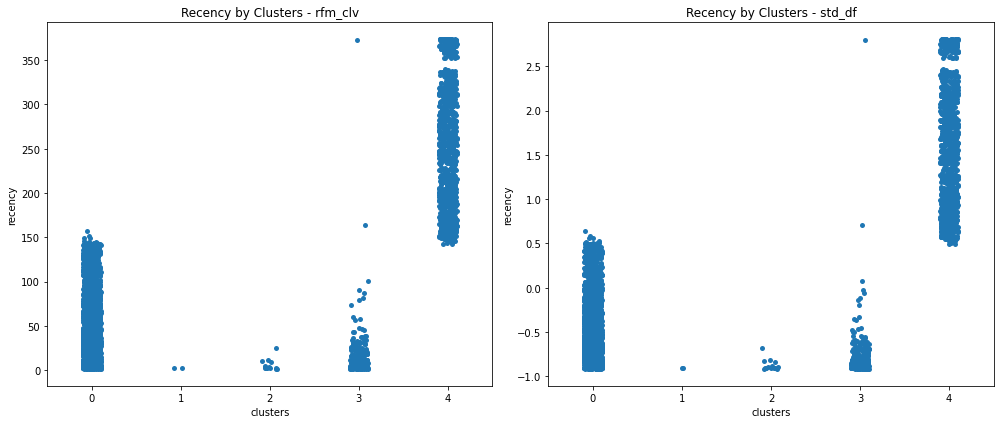

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 ردیف، 2 ستون

sbn.stripplot(x='clusters', y='recency' , data = rfm_clv ,  ax=axes[0])
axes[0].set_title("Recency by Clusters - rfm_clv")


sbn.stripplot(x='clusters', y='recency' , data = std_df ,  ax=axes[1])
axes[1].set_title("Recency by Clusters - std_df")


plt.tight_layout()
plt.show()


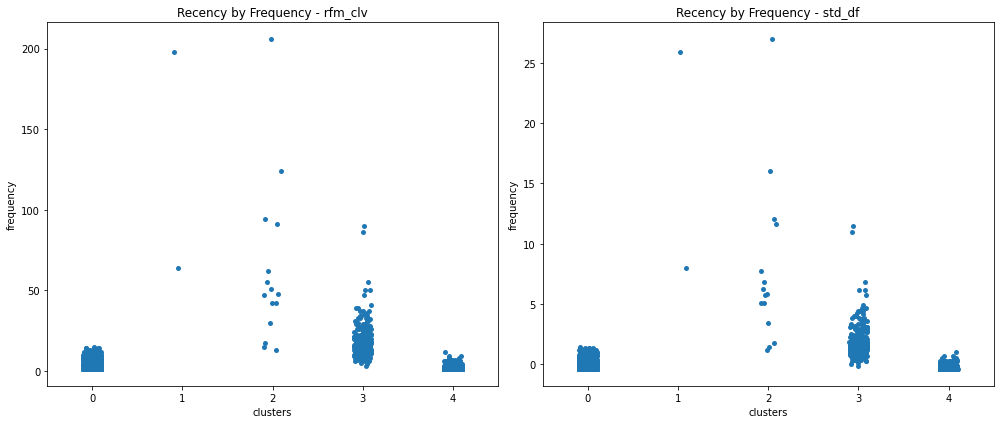

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 ردیف، 2 ستون

sbn.stripplot(x='clusters', y='frequency' , data = rfm_clv ,  ax=axes[0])
axes[0].set_title("Recency by Frequency - rfm_clv")


sbn.stripplot(x='clusters', y='frequency' , data = std_df ,  ax=axes[1])
axes[1].set_title("Recency by Frequency - std_df")


plt.tight_layout()
plt.show()


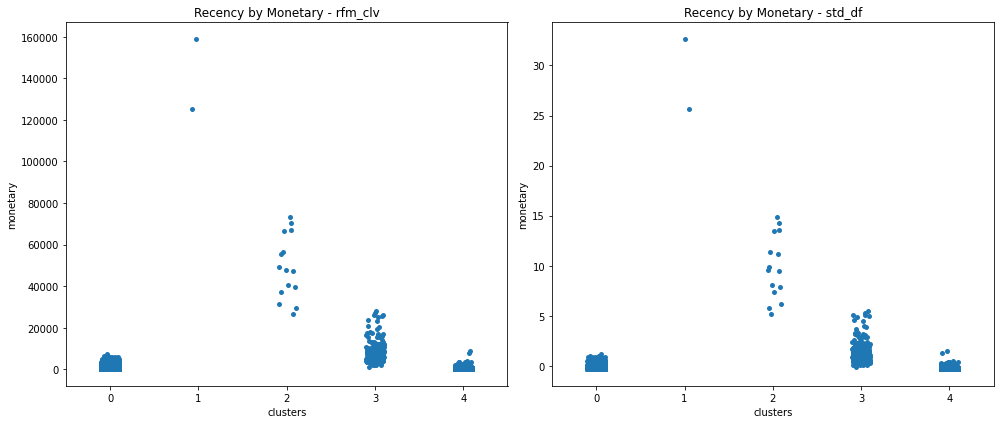

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 ردیف، 2 ستون

sbn.stripplot(x='clusters', y='monetary' , data = rfm_clv ,  ax=axes[0])
axes[0].set_title("Recency by Monetary - rfm_clv")


sbn.stripplot(x='clusters', y='monetary' , data = std_df ,  ax=axes[1])
axes[1].set_title("Recency by Monetary - std_df")


plt.tight_layout()
plt.show()


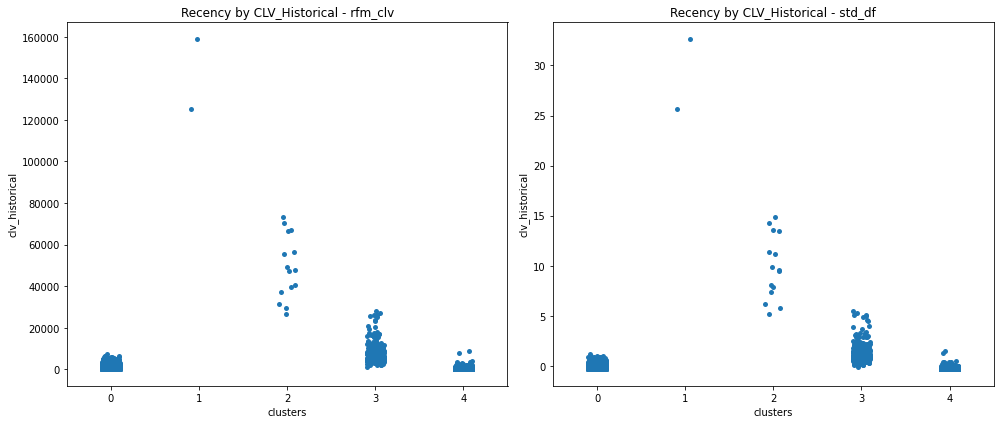

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # 1 ردیف، 2 ستون

sbn.stripplot(x='clusters', y='clv_historical' , data = rfm_clv ,  ax=axes[0])
axes[0].set_title("Recency by CLV_Historical - rfm_clv")


sbn.stripplot(x='clusters', y='clv_historical' , data = std_df ,  ax=axes[1])
axes[1].set_title("Recency by CLV_Historical - std_df")


plt.tight_layout()
plt.show()


In [110]:
cluster_profile = std_df.groupby("clusters").agg({
                                                'recency' : 'mean',
                                                'frequency' : 'mean',
                                                'monetary' : 'mean',
                                                'clv_historical' : 'mean',
                                                'customer_id' : 'count'
}).rename(columns = {"customer_id" : "customer_count"})

cluster_profile

,recency,frequency,monetary,clv_historical,customer_count
clusters,,,,,
0,-0.482972,-0.097851,-0.101632,-0.101632,2941
1,-0.906057,16.968845,29.136164,29.136164,2
2,-0.875051,7.798017,9.875986,9.875986,15
3,-0.773997,1.876114,1.286084,1.286084,273
4,1.554920,-0.354397,-0.244206,-0.244206,1059


In [111]:
cluster_profile.to_csv('../exports/rfm_clv_kmeans_normalized_data_mean.csv')

In [112]:
cluster_profile.to_excel('../exports/rfm_clv_kmeans_normalized_data_mean.xlsx')

In [113]:
cluster_customers = std_df.groupby("clusters")['customer_id'].apply(list)
cluster_customers

clusters
0    [12347.0, 12348.0, 12349.0, 12352.0, 12356.0, ...
1                                   [14646.0, 14911.0]
2    [12415.0, 12748.0, 13089.0, 13408.0, 13694.0, ...
3    [12409.0, 12428.0, 12431.0, 12433.0, 12437.0, ...
4    [12350.0, 12353.0, 12354.0, 12355.0, 12361.0, ...
Name: customer_id, dtype: object

In [114]:
cluster_customers.columns = ['clusters', 'customer_id']
cluster_customers

clusters
0    [12347.0, 12348.0, 12349.0, 12352.0, 12356.0, ...
1                                   [14646.0, 14911.0]
2    [12415.0, 12748.0, 13089.0, 13408.0, 13694.0, ...
3    [12409.0, 12428.0, 12431.0, 12433.0, 12437.0, ...
4    [12350.0, 12353.0, 12354.0, 12355.0, 12361.0, ...
Name: customer_id, dtype: object

In [115]:
cluster_customers_exploded = std_df[['clusters', 'customer_id']].sort_values(by='clusters')
cluster_customers_exploded

,clusters,customer_id
0,0,12347.0
2581,0,15885.0
2582,0,15886.0
2583,0,15888.0
2589,0,15898.0
...,...,...
3567,4,17268.0
2821,4,16216.0
3570,4,17277.0
3555,4,17251.0


In [116]:
cluster_customers_exploded[cluster_customers_exploded['clusters']==3]

,clusters,customer_id
2147,3,15290.0
2072,3,15194.0
724,3,13319.0
3250,3,16814.0
1035,3,13756.0
...,...,...
2333,3,15547.0
2307,3,15513.0
2798,3,16187.0
1397,3,14258.0
